In [61]:
! pip install numpy h5py pandas

In [62]:
import h5py as h5  #for handling data format
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [63]:
Data_SSE  = h5.File('COMPAS_Output_SSE.h5')

In [64]:
SP_SSE = Data_SSE['SSE_System_Parameters']
print(SP_SSE['Teff'].attrs['units']) # attrs refers to attributes
print(SP_SSE['Luminosity'].attrs['units'])

b'K'
b'Lsol'


In [65]:
L_SSE = SP_SSE['Luminosity'][()]
print(L_SSE.shape)                   # number of systems in this file
print(L_SSE[:5])                    # the values of the first 3 entries
T_SSE = SP_SSE['Teff'][()]
print(T_SSE.shape)                   # number of systems in this file
print(T_SSE[:5])                    # the values of the first 3 entries

(75000,)
[ 0.44208346  5.90186228 93.60656714  2.75878624  4.24579915]
(75000,)
[ 5378.08264143  7818.78582496 13344.80882652  6819.88165121
  7305.052703  ]


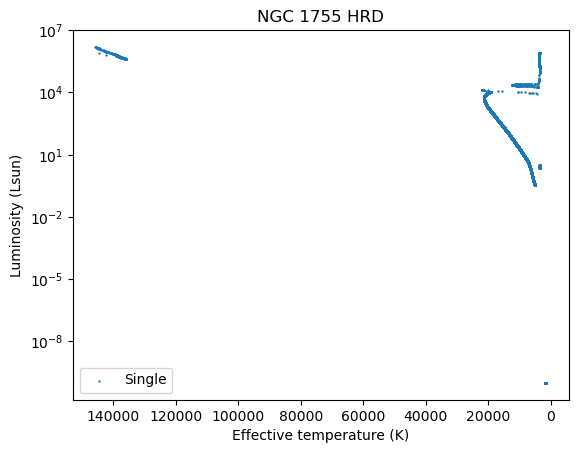

In [66]:
plt.scatter(T_SSE, L_SSE, label = 'Single', s = 0.5)
plt.gca().invert_xaxis()
plt.title('NGC 1755 HRD')
plt.xlabel('Effective temperature (K)')
plt.ylabel('Luminosity (Lsun)')
plt.yscale('log')
plt.legend()


In [67]:
def restrict(df, col, lower_limit, upper_limit):
    mask = (df[col] >= lower_limit) & (df[col] <= upper_limit)
    return df[mask]

In [68]:
SSE_file = pd.DataFrame({
           'L': L_SSE,
           'logL': np.log10(L_SSE),
           'Teff': T_SSE,
           'M': SP_SSE['Mass'][()],
           'Z': SP_SSE['Metallicity@ZAMS'][()],
           'type': SP_SSE['Stellar_Type'][()]
})
SSE_file = restrict(SSE_file, 'type', 0, 1) #MS stars only

In [69]:
SSE_file = SSE_file.iloc[::2]
SSE_file = SSE_file.reset_index(drop=True)

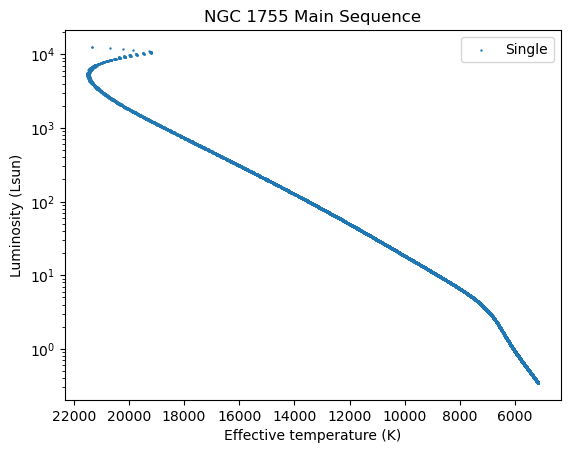

In [70]:
plt.scatter(SSE_file.Teff, SSE_file.L, label = 'Single', s = 0.5)
plt.gca().invert_xaxis()
plt.title('NGC 1755 Main Sequence')
plt.xlabel('Effective temperature (K)')
plt.ylabel('Luminosity (Lsun)')
plt.yscale('log')
plt.legend()

In [71]:
SSE_file.shape

(35984, 6)

In [91]:
df = pd.read_csv('BC_table.csv')
df.head(3)

,logTeff,logg,F218W1,F225W1,F275W1,F336W,F390W,F438W,F475W,F555W,F606W,F625W,F775W,F814W,F105W,F110W,F125W,F140W,F160W,F218W1_Av0.5,F225W1_Av0.5,F275W1_Av0.5,F336W_Av0.5,F390W_Av0.5,F438W_Av0.5,F475W_Av0.5,F555W_Av0.5,F606W_Av0.5,F625W_Av0.5,F775W_Av0.5,F814W_Av0_5,F105W_Av0.5,F110W_Av0.5,F125W_Av0.5,F140W_Av0.5,F160W_Av0.5,F218W1_Av1,F225W1_Av1,F275W1_Av1,F336W_Av1,F390W_Av1,F438W_Av1,F475W_Av1,F555W_Av1,F606W_Av1,F625W_Av1,F775W_Av1,F814W_Av1,F105W_Av1,F110W_Av1,F125W_Av1,F140W_Av1,F160W_Av1,F218W1_Av2,F225W1_Av2,F275W1_Av2,F336W_Av2,F390W_Av2,F438W_Av2,F475W_Av2,F555W_Av2,F606W_Av2,F625W_Av2,F775W_Av2,F814W_Av2,F105W_Av2,F110W_Av2,F125W_Av2,F140W_Av2,F160W_Av2,F218W1_Av5,F225W1_Av5,F275W1_Av5,F336W_Av5,F390W_Av5,F438W_Av5,F475W_Av5,F555W_Av5,F606W_Av5,F625W_Av5,F775W_Av5,F814W_Av5,F105W_Av5,F110W_Av5,F125W_Av5,F140W_Av5,F160W_Av5,F218W1_Av10,F225W1_Av10,F275W1_Av10,F336W_Av10,F390W_Av10,F438W_Av10,F475W_Av10,F555W_Av10,F606W_Av10,F625W_Av10,F775W_Av10,F814W_Av10,F105W_Av10,F110W_Av10,F125W_Av10,F140W_Av10,F160W_Av10,F218W1_Av20,F225W1_Av20,F275W1_Av20,F336W_Av20,F390W_Av20,F438W_Av20,F475W_Av20,F555W_Av20,F606W_Av20,F625W_Av20,F775W_Av20,F814W_Av20,F105W_Av20,F110W_Av20,F125W_Av20,F140W_Av20,F160W_Av20
0,3.6,0.0,-8.550856,-8.757045,-9.044397,-4.949033,-3.493188,-2.747412,-1.813194,-1.113296,-0.576907,-0.284791,0.438298,0.561705,1.186124,1.401886,1.638987,1.955024,2.257806,-9.119568,-9.116209,-9.670583,-5.758744,-4.190389,-3.404624,-2.384833,-1.618001,-1.024082,-0.710708,0.110763,0.262475,0.999620,1.238890,1.497164,1.835819,2.156475,-9.661217,-9.456775,-10.221345,-6.566806,-4.886689,-4.061247,-2.953875,-2.119050,-1.468181,-1.135506,-0.215870,-0.034765,0.813655,1.076912,1.355574,1.716844,2.055214,-10.651076,-10.096635,-11.127136,-8.176575,-6.276716,-5.372757,-4.084471,-3.110569,-2.347702,-1.981806,-0.866422,-0.623259,0.443322,0.755932,1.073089,1.479580,1.852904,-12.899967,-11.822211,-13.067296,-12.875295,-10.428076,-9.293801,-7.422077,-6.008269,-4.926435,-4.495537,-2.796240,-2.341286,-0.655257,-0.184602,0.231113,0.773197,1.247645,-15.586590,-14.398286,-15.671070,-18.514723,-17.283667,-15.775476,-12.841712,-10.631778,-9.078679,-8.610482,-5.941121,-5.058741,-2.447648,-1.687358,-1.154584,-0.386749,0.244361,-20.315536,-19.122501,-20.339394,-24.036390,-27.576980,-25.376925,-23.200737,-19.326033,-17.080110,-16.631720,-11.996356,-10.102602,-5.911192,-4.518178,-3.866084,-2.647554,-1.742331
1,3.6,0.5,-8.434737,-8.737934,-8.825985,-4.616609,-3.289571,-2.600698,-1.751512,-1.085085,-0.570389,-0.284705,0.426331,0.547923,1.168884,1.383722,1.621077,1.944197,2.259781,-9.015420,-9.107421,-9.500493,-5.426578,-3.988458,-3.258636,-2.325409,-1.591457,-1.018474,-0.710950,0.098791,0.248615,0.982363,1.220702,1.479226,1.825111,2.158513,-9.570368,-9.455058,-10.098359,-6.235073,-4.686392,-3.915971,-2.896611,-2.094091,-1.463438,-1.136070,-0.227848,-0.048703,0.796381,1.058700,1.337609,1.706256,2.057315,-10.589017,-10.103150,-11.076629,-7.846626,-6.079534,-5.228867,-4.031224,-3.088544,-2.344556,-1.982995,-0.878406,-0.637352,0.426019,0.737674,1.055072,1.469233,1.855131,-12.899905,-11.836220,-13.077634,-12.578384,-10.239166,-9.153776,-7.378496,-5.993287,-4.927118,-4.498445,-2.808212,-2.355814,-0.672627,-0.202980,0.212952,0.763569,1.250250,-15.603128,-14.414371,-15.687058,-18.486267,-17.107569,-15.642645,-12.807554,-10.624289,-9.083341,-8.615700,-5.952991,-5.073823,-2.465066,-1.705887,-1.172944,-0.395192,0.247588,-20.333570,-19.139334,-20.356607,-24.056854,-27.584060,-25.388624,-23.178408,-19.327300,-17.088285,-16.639729,-12.007947,-10.117970,-5.928541,-4.536878,-3.884706,-2.653770,-1.737899
2,3.6,1.0,-8.344736,-8.715978,-8.607851,-4.335736,-3.128765,-2.492011,-1.716176,-1.072622,-0.571264,-0.287990,0.417110,0.537721,1.157060,1.370718,1.608076,1.935979,2.260965,-8.934277,-9.096403,-9.324210,-5.145873,-3.829269,-3.150584,-2.292001,-1.580035,-1.019768,-0.714439,0.089593,0.238392,0.970525,1.207665,1.466194,1.816980,2.159743,-9.499085,-9.451275,-9.965788,-5.9546

In [92]:
def convert_to_mag(L, Teff, table, A_coeff, filter):
    count = 0
    '''
    # ref: https://www.nature.com/articles/s41550-021-01597-5#Sec2
    '''
    M_bol = 4.74 - 2.5*np.log10(np.array(L))
    M_F = np.zeros(len(M_bol))
    for i in range(len(M_bol)):
        curr_logTeff = round(np.log10(Teff[i]),2)
        if curr_logTeff < 3.60 or curr_logTeff > 4.32:
            M_F[i] = np.NaN
            count += 1
            continue
        elif filter == 'F814W':
            BC_F = table.F814W_Av0_5[(table.logTeff == curr_logTeff) & (table.logg == 0.0)]
        elif filter == 'F336W':
            BC_F = table.F336W_Av1[(table.logTeff == curr_logTeff) & (table.logg == 0.0)]
        M_F[i] = M_bol[i] - BC_F
    print('# of Nans: ' + str(count))
    return M_F +  A_coeff * 0.14 + 18.29 #E(B-V) + (m-M)

In [93]:
simul_mF814W_SSE = convert_to_mag(SSE_file.L, SSE_file.Teff, df, 2.04, 'F814W')
simul_mF336W_SSE = convert_to_mag(SSE_file.L, SSE_file.Teff, df, 5.16, 'F336W')

# of Nans: 382
# of Nans: 382


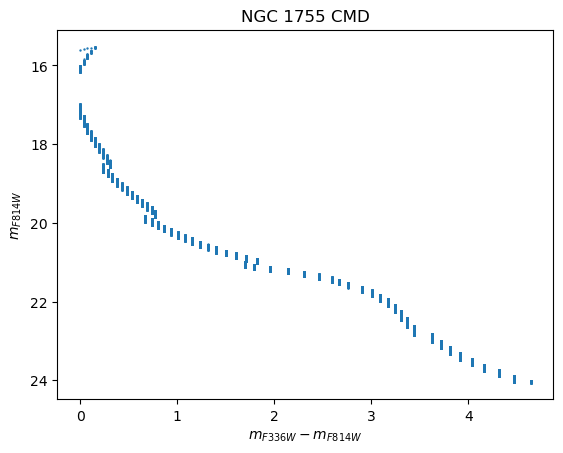

In [94]:
plt.scatter(simul_mF336W_SSE - simul_mF814W_SSE, simul_mF814W_SSE, s = 0.5)
plt.title('NGC 1755 CMD')
plt.xlabel(r'$m_{F336W}-m_{F814W}$')
plt.ylabel(r'$m_{F814W}$')
plt.gca().invert_yaxis()
plt.ticklabel_format(useOffset=False)